In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import os

import sys
import pickle
from scipy.optimize import curve_fit

path = os.getcwd().split(os.sep + 'GUI')[0]
if path not in sys.path:
    print("not here")
    sys.path.append(path)

import neurolib.dashboard.data as data
from neurolib.models.aln import ALNModel
import neurolib.dashboard.layout as layout
import neurolib.dashboard.functions as functions
from neurolib.utils import plotFunctions as plotFunc

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2    

not here


In [2]:
readpath = '.' + os.sep
#savepath = os.path.join(os.getcwd().split('neurolib')[0], 'writing' + os.sep + 'paper1' + os.sep + 'Frontiers' + os.sep + 'images')

with open(readpath + os.sep + 'bi.pickle','rb') as file:
    load_array= pickle.load(file)
ext_exc = load_array[0]
ext_inh = load_array[1]

with open(readpath + os.sep + 'bi_granular.pickle','rb') as file:
    load_array= pickle.load(file)
ext_exc_granular = load_array[0]
ext_inh_granular = load_array[1]

with open(readpath + os.sep + 'boundary_bi_granular.pickle','rb') as file:
    load_array= pickle.load(file)
boundary_exc_granular = load_array[0]
boundary_inh_granular = load_array[1]

grid_resolution = layout.grid_resolution
grid_resolution_granular = layout.grid_resolution_granular

dist_up_regime = np.zeros((len(ext_exc), 2))
dist_down_regime = np.zeros((len(ext_exc)))

cmap = layout.getcolormap()
darkgrey, midgrey, lightgrey, color_bi_updown, color_LC, color_bi_uposc = layout.getcolors()
exc_red = cmap(3)
inh_blue=cmap(0)
green = cmap(2)

aln = ALNModel()
data.set_parameters(aln)
state_vars = aln.state_vars

savepath = os.path.join(os.getcwd() + os.sep + 'acw')

In [3]:
##############################################################
def setinit(init_vars_, model):
    state_vars = model.state_vars
    init_vars = model.init_vars
    for iv in range(len(init_vars)):
        for sv in range(len(state_vars)):
            if state_vars[sv] in init_vars[iv]:
                #print("set init vars ", )
                if model.params[init_vars[iv]].ndim == 2:
                    model.params[init_vars[iv]][0,:] = init_vars_[sv]
                else:
                    model.params[init_vars[iv]][0] = init_vars_[sv]

In [4]:
def readcase(case_, readpath):
    
    global ind_, type_, mu_e, mu_i, a_ee, a_ei, a_ie, a_ii, cost_node, w_ee, w_ei, w_ie, w_ii, target_high, target_low 
    global d_e, d_i, d_total, ufp_e, ufp_i
    global a_e, a_i, w_e, w_i, cost_s_e, cost_s_i
    global cost_p_x, cost_p_y, cost_s_ee, cost_s_ei, cost_s_ie, cost_s_ii
    global cost_e_ee, cost_e_ei, cost_e_ie, cost_e_ii, cost_e_e, cost_e_i
    global target_h_e, target_h_i, target_l_e, target_l_i, target_diff_e, target_diff_i
    
    data_array = data.read_data_1(aln, readpath, case_)
    ind_, type_, mu_e, mu_i, a_, cost_node, w_, target_high, target_low = data_array
        
    opt_control = [None] * len(ind_)
    opt_state = [None] * len(ind_)
    
    control_data = data.read_control(readpath, case_)
    opt_control = control_data[2]
    opt_state = control_data[3]
        
    d_e = [None] * len(ind_)
    d_i = [None] * len(ind_)
    a_ee = [None] * len(ind_)
    a_ei = [None] * len(ind_)
    a_ie = [None] * len(ind_)
    a_ii = [None] * len(ind_)
    w_ee = [None] * len(ind_)
    w_ei = [None] * len(ind_)
    w_ie = [None] * len(ind_)
    w_ii = [None] * len(ind_)
    d_total = [None] * len(ind_)
    ufp_e = [None] * len(ind_)
    ufp_i = [None] * len(ind_)
    
    a_e = [None] * len(ind_)
    a_i = [None] * len(ind_)
    w_e = [None] * len(ind_)
    w_i = [None] * len(ind_)

    target_h_e = [None] * len(ind_)
    target_h_i = [None] * len(ind_)
    target_l_e = [None] * len(ind_)
    target_l_i = [None] * len(ind_)
    target_diff_e = [None] * len(ind_)
    target_diff_i = [None] * len(ind_)
    
    cost_p_x = [None] * len(ext_exc)
    cost_p_y = [None] * len(ext_exc)
    cost_s_ee = [None] * len(ext_exc)
    cost_e_ee = [None] * len(ext_exc)
    cost_s_ei = [None] * len(ext_exc)
    cost_e_ei = [None] * len(ext_exc)
    cost_s_ie = [None] * len(ext_exc)
    cost_e_ie = [None] * len(ext_exc)
    cost_s_ii = [None] * len(ext_exc)
    cost_e_ii = [None] * len(ext_exc)
    
    cost_s_e = [None] * len(ext_exc)
    cost_s_i = [None] * len(ext_exc)
    
    cost_e_e = [None] * len(ext_exc)
    cost_e_i = [None] * len(ext_exc)
        
    for i in ind_:
        
        if type(opt_control[i]) == type(None) or type_[i] == 6:
            continue
                        
        a_ee[i] = a_[2,i]
        a_ei[i] = a_[3,i]
        a_ie[i] = a_[4,i]
        a_ii[i] = a_[5,i]
        
        w_ee[i] = w_[2,i]
        w_ei[i] = w_[3,i]
        w_ie[i] = w_[4,i]
        w_ii[i] = w_[5,i]
        
        a_e[i] = a_[0,i]
        a_i[i] = a_[1,i]
        
        w_e[i] = w_[0,i]
        w_i[i] = w_[1,i]
    
        if case_ in ['1', '2']:
            d_e[i] = data.dist_right(mu_e[i], mu_i[i], ext_exc_granular, ext_inh_granular, grid_resolution)
            d_i[i] = data.dist_low(mu_e[i], mu_i[i], ext_exc_granular, ext_inh_granular, grid_resolution)
            d_total[i] = data.dist_up_regime(mu_e[i], mu_i[i], boundary_exc_granular, boundary_inh_granular,
                                                   grid_resolution_granular)
            ufp = data.get_ufp(opt_state[i], 0)[0]
        else:
            d_e[i] = data.dist_left(mu_e[i], mu_i[i], ext_exc_granular, ext_inh_granular, grid_resolution)
            d_i[i] = data.dist_up(mu_e[i], mu_i[i], ext_exc_granular, ext_inh_granular, grid_resolution)
            d_total[i] = data.dist_down_regime(mu_e[i], mu_i[i], boundary_exc_granular, boundary_inh_granular,
                                               grid_resolution_granular)
            ufp = data.get_ufp(opt_state[i], 2)[0]

        if ufp[0] > 1e-1  and ufp[1] > 1e-1:
            ufp_e[i] = ufp[0]
            ufp_i[i] = ufp[1]
            
        if type(w_ee[i]) == type(None) or a_ee[i] < 1e-8:
            w_ee[i] = 0.
        if type(w_ei[i]) == type(None) or a_ei[i] < 1e-8:
            w_ei[i] = 0.
        if type(w_ie[i]) == type(None) or a_ie[i] < 1e-8:
            w_ie[i] = 0.
        if type(w_ii[i]) == type(None) or a_ii[i] < 1e-8:
            w_ii[i] = 0.
            
        cost_p_x[i] = cost_node[i][0][0][0]
        cost_p_y[i] = cost_node[i][0][0][1]
        
        cost_s_ee[i] = cost_node[i][2][0][2]
        cost_e_ee[i] = cost_node[i][1][0][2]
        cost_s_ei[i] = cost_node[i][2][0][3]
        cost_e_ei[i] = cost_node[i][1][0][3]
        cost_s_ie[i] = cost_node[i][2][0][4]
        cost_e_ie[i] = cost_node[i][1][0][4]
        cost_s_ii[i] = cost_node[i][2][0][5]
        cost_e_ii[i] = cost_node[i][1][0][5]
        
        cost_s_e[i] = cost_node[i][2][0][0]
        cost_s_i[i] = cost_node[i][2][0][1]
        
        cost_e_e[i] = cost_node[i][1][0][0]
        cost_e_i[i] = cost_node[i][1][0][1]
                
        if cost_s_ie[i] > 1.:
            print(i, mu_e[i], mu_i[i])
            print(cost_node[i])

        target_h_e[i] = target_high[i][0]
        target_h_i[i] = target_high[i][1]
        target_l_e[i] = target_low[i][0]
        target_l_i[i] = target_low[i][1]
        target_diff_e[i] = target_high[i][0] - target_low[i][0]
        target_diff_i[i] = target_high[i][1] - target_low[i][1]

In [22]:
readpath = '.' + os.sep + 'data_final_rate' + os.sep
readcase('1', readpath)

case =  ./data_final_rate/ 1
case =  ./data_final_rate/ 1


correlation coefficient:  [[1.         0.97504148]
 [0.97504148 1.        ]]


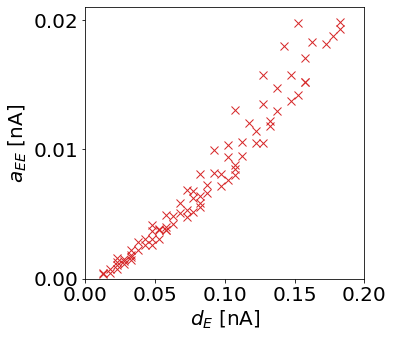

correlation coefficient:  [[1.         0.98235935]
 [0.98235935 1.        ]]


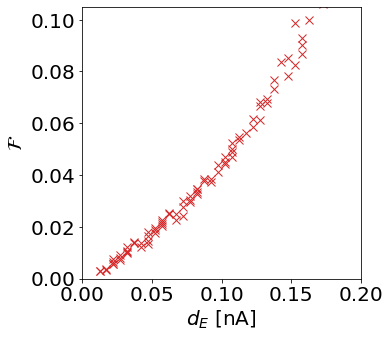

correlation coefficient:  [[1.         0.72403821]
 [0.72403821 1.        ]]


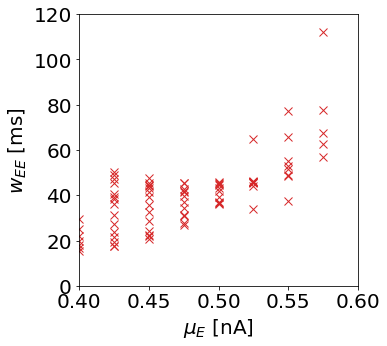

In [23]:
fig_a, ax = plt.subplots(figsize=(5,5))

fontsize_ = 20
markersize_ = 8
marker_ = 'x'

fit_ = [[],[]]

for i in range(len(d_e)):
    if type(a_ee[i]) == type(None):
        continue

    if np.abs(a_ii[i]) < np.abs(a_ee[i]):
        color_ = exc_red
        ax.plot(d_e[i], np.abs(a_ee[i]), marker=marker_, color=color_, markersize=markersize_)
        fit_[0].append(d_e[i])
        fit_[1].append(np.abs(a_ee[i]))
   
ax.set_xlim(0., 0.2)
ax.set_xticks(np.arange(0., 0.23, 0.05))
ax.set_ylim(0., 0.021)
ax.set_yticks(np.arange(0., 0.021, 0.01))
ax.grid(False)

ax.set_xlabel(r'$d_E$ [nA]', fontsize=fontsize_)
ax.set_ylabel(r'$a_{EE}$ [nA]', fontsize=fontsize_)

ax.tick_params(axis='x', labelsize=fontsize_)
ax.tick_params(axis='y', labelsize=fontsize_)

#ax.set_title(r'Amplitude of control signal', fontsize=fontsize_)
print( 'correlation coefficient: ', np.corrcoef( fit_[0], fit_[1])  )

filename_ = 'A_D_rate.png'
fig_a.savefig(os.path.join(savepath, filename_), bbox_inches='tight', facecolor=fig_a.get_facecolor(),
            edgecolor='none', dpi=300)
plt.show()

fig_a, ax = plt.subplots(figsize=(5,5))

fit_ = [[],[]]

for i in range(len(d_e)):
    if type(a_ee[i]) == type(None):
        continue

    if np.abs(a_ii[i]) < np.abs(a_ee[i]):
        color_ = exc_red
        total_cost = cost_p_x[i] + cost_s_ee[i] + cost_s_ii[i]
        ax.plot(d_e[i], total_cost, marker=marker_, color=color_, markersize=markersize_)
        fit_[0].append(d_e[i])
        fit_[1].append(total_cost)
        
ax.set_xlim(0., 0.2)
ax.set_xticks(np.arange(0., 0.23, 0.05))
ax.set_ylim(0., 0.105)
ax.set_yticks(np.arange(0., 0.11, 0.02))
ax.grid(False)

ax.set_xlabel(r'$d_E$ [nA]', fontsize=fontsize_)
ax.set_ylabel(r'$\mathcal{F}$', fontsize=fontsize_)

ax.tick_params(axis='x', labelsize=fontsize_)
ax.tick_params(axis='y', labelsize=fontsize_)

#ax.set_title(cols[0], fontsize=fontsize_)
print( 'correlation coefficient: ', np.corrcoef( fit_[0], fit_[1])  )

filename_ = 'F_D_rate.png'
fig_a.savefig(os.path.join(savepath, filename_), bbox_inches='tight', facecolor=fig_a.get_facecolor(),
            edgecolor='none', dpi=300)
plt.show()

fig_a, ax = plt.subplots(figsize=(5,5))

fit_ = [[], []]

for i in range(len(d_e)):
    if type(a_ee[i]) == type(None):
        continue

    if np.abs(a_ii[i]) < np.abs(a_ee[i]):
        color_ = exc_red
        ax.plot(mu_e[i], w_ee[i], marker=marker_, color=color_, markersize=markersize_)
        fit_[0].append(mu_e[i])
        fit_[1].append(w_ee[i])
     
ax.set_xlim(0.4, 0.6)
ax.set_xticks(np.arange(0.4, 0.65, 0.05))
ax.set_ylim(0., 120.)
ax.set_yticks(np.arange(0., 121., 20.))
ax.grid(False)

ax.set_xlabel(r'$\mu_E$ [nA]', fontsize=fontsize_)
ax.set_ylabel(r'$w_{EE}$ [ms]', fontsize=fontsize_)

ax.tick_params(axis='x', labelsize=fontsize_)
ax.tick_params(axis='y', labelsize=fontsize_)

#ax.set_title(cols[0], fontsize=fontsize_)
# best correlation with mu_e
print( 'correlation coefficient: ', np.corrcoef( fit_[0], fit_[1])  )

filename_ = 'W_mu_rate.png'
fig_a.savefig(os.path.join(savepath, filename_), bbox_inches='tight', facecolor=fig_a.get_facecolor(),
            edgecolor='none', dpi=300)
plt.show()

In [7]:
readpath = '.' + os.sep + 'data_final_current' + os.sep
readcase('1', readpath)

case =  ./data_final_current/ 1
case =  ./data_final_current/ 1


correlation coefficient:  [[1.         0.99890372]
 [0.99890372 1.        ]]
correlation coefficient:  [[1.         0.99448191]
 [0.99448191 1.        ]]


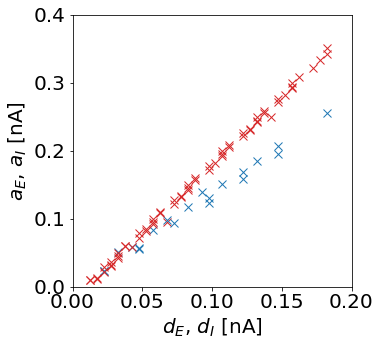

correlation coefficient:  [[1.         0.99688557]
 [0.99688557 1.        ]]
correlation coefficient:  [[1.         0.99145417]
 [0.99145417 1.        ]]


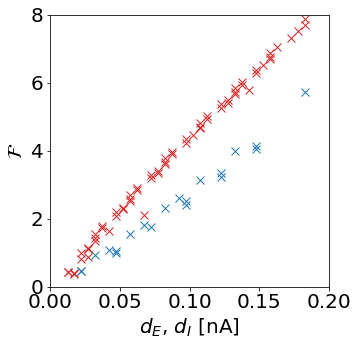

correlation coefficient:  [[ 1.         -0.72513931]
 [-0.72513931  1.        ]]
correlation coefficient:  [[1.         0.85860353]
 [0.85860353 1.        ]]


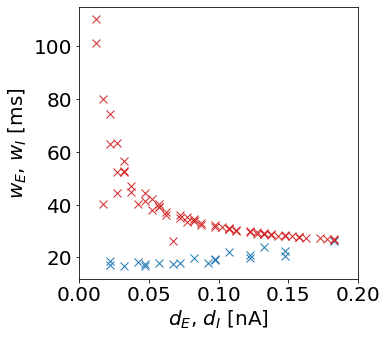

In [8]:
fig_a, ax = plt.subplots(figsize=(5,5))

fit_e = [[],[]]
fit_i = [[],[]]

for i in range(len(d_e)):
    if type(a_e[i]) == type(None):
        continue

    if np.abs(a_i[i]) < np.abs(a_e[i]):
        color_ = exc_red
        ax.plot(d_e[i], np.abs(a_e[i])/5., marker=marker_, color=color_, markersize=markersize_)
        fit_e[0].append(d_e[i])
        fit_e[1].append(np.abs(a_e[i])/5.)
    else:
        color_ = inh_blue
        ax.plot(d_i[i], np.abs(a_i[i])/5., marker=marker_, color=color_, markersize=markersize_)
        fit_i[0].append(d_i[i])
        fit_i[1].append(np.abs(a_i[i])/5.)


ax.set_xlim(0., 0.02)
ax.set_xticks(np.arange(0., 0.23, 0.05))
ax.set_ylim(0., 0.4)
ax.set_yticks(np.arange(0., 0.41, 0.1))
ax.grid(False)

ax.set_xlabel(r'$d_E$, $d_I$ [nA]', fontsize=fontsize_)
ax.set_ylabel(r'$a_{E}$, $a_I$ [nA]', fontsize=fontsize_)

ax.tick_params(axis='x', labelsize=fontsize_)
ax.tick_params(axis='y', labelsize=fontsize_)

#ax.set_title(r'Amplitude of control signal', fontsize=fontsize_)
print( 'correlation coefficient: ', np.corrcoef( fit_e[0], fit_e[1])  )
print( 'correlation coefficient: ', np.corrcoef( fit_i[0], fit_i[1])  )

filename_ = 'A_D_current.png'
fig_a.savefig(os.path.join(savepath, filename_), bbox_inches='tight', facecolor=fig_a.get_facecolor(),
            edgecolor='none', dpi=300)
plt.show()

fig_c, ax = plt.subplots(figsize=(5,5))

fit_e = [[],[]]
fit_i = [[],[]]

for i in range(len(d_e)):
    if type(a_e[i]) == type(None):
        continue
        
    total_cost = cost_p_x[i] + cost_s_e[i] + cost_s_i[i]

    if np.abs(a_i[i]) < np.abs(a_e[i]):
        color_ = exc_red
        ax.plot(d_e[i], total_cost, marker=marker_, color=color_, markersize=markersize_)
        fit_e[0].append(d_e[i])
        fit_e[1].append(total_cost)
    else:
        color_ = inh_blue
        ax.plot(d_i[i], total_cost, marker=marker_, color=color_, markersize=markersize_)
        fit_i[0].append(d_i[i])
        fit_i[1].append(total_cost)


ax.set_xlim(0., 0.02)
ax.set_xticks(np.arange(0., 0.23, 0.05))
ax.set_ylim(0., 8)
ax.set_yticks(np.arange(0., 8.1, 2))
ax.grid(False)

ax.set_xlabel(r'$d_E$, $d_I$ [nA]', fontsize=fontsize_)
ax.set_ylabel(r'$\mathcal{F}$', fontsize=fontsize_)


ax.tick_params(axis='x', labelsize=fontsize_)
ax.tick_params(axis='y', labelsize=fontsize_)

#ax.set_title(r'Amplitude of control signal', fontsize=fontsize_)
print( 'correlation coefficient: ', np.corrcoef( fit_e[0], fit_e[1])  )
print( 'correlation coefficient: ', np.corrcoef( fit_i[0], fit_i[1])  )

filename_ = 'F_D_current.png'
fig_c.savefig(os.path.join(savepath, filename_), bbox_inches='tight', facecolor=fig_a.get_facecolor(),
            edgecolor='none', dpi=300)
plt.show()

fig_w, ax = plt.subplots(figsize=(5,5))

fit_e = [[],[]]
fit_i = [[],[]]

for i in range(len(d_e)):
    if type(a_ee[i]) == type(None):
        continue

    if np.abs(a_i[i]) < np.abs(a_e[i]):
        color_ = exc_red
        ax.plot(d_e[i], w_e[i], marker=marker_, color=color_, markersize=markersize_)
        fit_e[0].append(d_e[i])
        fit_e[1].append(w_e[i])
    else:
        color_ = inh_blue
        ax.plot(d_i[i], w_i[i], marker=marker_, color=color_, markersize=markersize_)
        fit_i[0].append(d_i[i])
        fit_i[1].append(w_i[i])
     
ax.set_xlim(0., 0.2)
ax.set_xticks(np.arange(0., 0.21, 0.05))
#ax.set_ylim(0., 120.)
#ax.set_yticks(np.arange(0., 121., 20.))
ax.grid(False)

ax.set_xlabel(r'$d_E$, $d_I$ [nA]', fontsize=fontsize_)
ax.set_ylabel(r'$w_E$, $w_I$ [ms]', fontsize=fontsize_)

ax.tick_params(axis='x', labelsize=fontsize_)
ax.tick_params(axis='y', labelsize=fontsize_)

#ax.set_title(cols[0], fontsize=fontsize_)
# best correlation with mu_e
print( 'correlation coefficient: ', np.corrcoef( fit_e[0], fit_e[1])  )
print( 'correlation coefficient: ', np.corrcoef( fit_i[0], fit_i[1])  )

filename_ = 'W_D_current.png'
fig_w.savefig(os.path.join(savepath, filename_), bbox_inches='tight', facecolor=fig_a.get_facecolor(),
            edgecolor='none', dpi=300)
plt.show()

In [20]:
readpath = '.' + os.sep + 'data_final_rate' + os.sep
readcase('2', readpath)

case =  ./data_final_rate/ 2
case =  ./data_final_rate/ 2


correlation coefficient:  [[1.         0.97410726]
 [0.97410726 1.        ]]


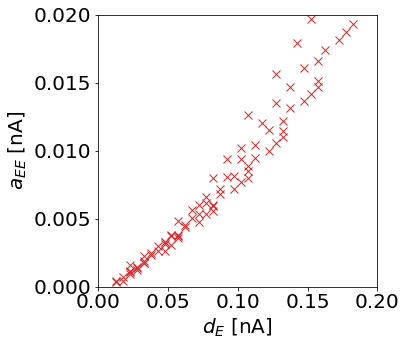

correlation coefficient:  [[1.         0.89546307]
 [0.89546307 1.        ]]


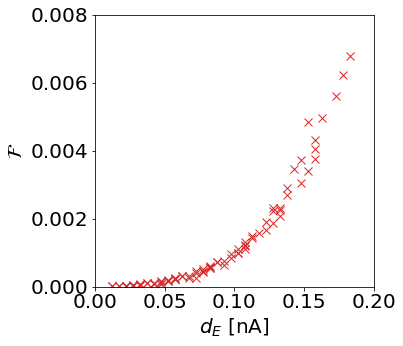

correlation coefficient:  [[1.         0.71218605]
 [0.71218605 1.        ]]


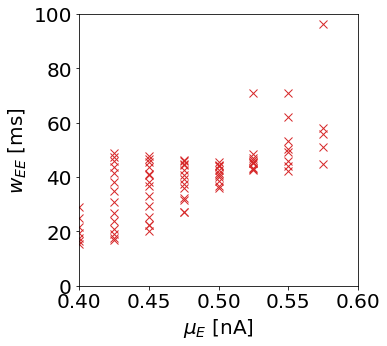

In [21]:
fig_a, ax = plt.subplots(figsize=(5,5))

fit_ = [[],[]]

for i in range(len(d_e)):
    if type(a_ee[i]) == type(None):
        continue

    if np.abs(a_ii[i]) < np.abs(a_ee[i]):
        color_ = exc_red
        ax.plot(d_e[i], np.abs(a_ee[i]), marker=marker_, color=color_, markersize=markersize_)
        fit_[0].append(d_e[i])
        fit_[1].append(np.abs(a_ee[i]))
   
ax.set_xlim(0., 0.2)
ax.set_xticks(np.arange(0., 0.23, 0.05))
ax.set_ylim(0., 0.02)
ax.set_yticks(np.arange(0., 0.023, 0.005))
ax.grid(False)

ax.set_xlabel(r'$d_E$ [nA]', fontsize=fontsize_)
ax.set_ylabel(r'$a_{EE}$ [nA]', fontsize=fontsize_)

ax.tick_params(axis='x', labelsize=fontsize_)
ax.tick_params(axis='y', labelsize=fontsize_)

#ax.set_title(r'Amplitude of control signal', fontsize=fontsize_)
print( 'correlation coefficient: ', np.corrcoef( fit_[0], fit_[1])  )

filename_ = 'A_D_rate2.png'
fig_a.savefig(os.path.join(savepath, filename_), bbox_inches='tight', facecolor=fig_a.get_facecolor(),
            edgecolor='none', dpi=300)
plt.show()

fig_a, ax = plt.subplots(figsize=(5,5))

fit_ = [[],[]]

for i in range(len(d_e)):
    if type(a_ee[i]) == type(None):
        continue

    if np.abs(a_ii[i]) < np.abs(a_ee[i]):
        color_ = exc_red
        total_cost = cost_p_x[i] + cost_e_ee[i] + cost_e_ei[i] + cost_e_ei[i] + cost_e_ii[i]
        ax.plot(d_e[i], total_cost, marker=marker_, color=color_, markersize=markersize_)
        fit_[0].append(d_e[i])
        fit_[1].append(total_cost)
        
ax.set_xlim(0., 0.2)
ax.set_xticks(np.arange(0., 0.23, 0.05))
ax.set_ylim(0., 0.008)
ax.set_yticks(np.arange(0., 0.009, 0.002))
ax.grid(False)

ax.set_xlabel(r'$d_E$ [nA]', fontsize=fontsize_)
ax.set_ylabel(r'$\mathcal{F}$', fontsize=fontsize_)

ax.tick_params(axis='x', labelsize=fontsize_)
ax.tick_params(axis='y', labelsize=fontsize_)

#ax.set_title(cols[0], fontsize=fontsize_)
print( 'correlation coefficient: ', np.corrcoef( fit_[0], fit_[1])  )

filename_ = 'F_D_rate2.png'
fig_a.savefig(os.path.join(savepath, filename_), bbox_inches='tight', facecolor=fig_a.get_facecolor(),
            edgecolor='none', dpi=300)
plt.show()

fig_a, ax = plt.subplots(figsize=(5,5))

fit_ = [[], []]

for i in range(len(d_e)):
    if type(a_ee[i]) == type(None):
        continue

    if np.abs(a_ii[i]) < np.abs(a_ee[i]):
        color_ = exc_red
        ax.plot(mu_e[i], w_ee[i], marker=marker_, color=color_, markersize=markersize_)
        fit_[0].append(mu_e[i])
        fit_[1].append(w_ee[i])
        
    if w_ee[i] < 4:
        print(i, mu_e[i], mu_i[i], w_ee[i])
     
ax.set_xlim(0.4, 0.6)
ax.set_xticks(np.arange(0.4, 0.65, 0.05))
ax.set_ylim(0., 100.)
ax.set_yticks(np.arange(0., 101., 20.))
ax.grid(False)

ax.set_xlabel(r'$\mu_E$ [nA]', fontsize=fontsize_)
ax.set_ylabel(r'$w_{EE}$ [ms]', fontsize=fontsize_)

ax.tick_params(axis='x', labelsize=fontsize_)
ax.tick_params(axis='y', labelsize=fontsize_)

#ax.set_title(cols[0], fontsize=fontsize_)
# best correlation with mu_e
print( 'correlation coefficient: ', np.corrcoef( fit_[0], fit_[1])  )

filename_ = 'W_mu_rate2.png'
fig_a.savefig(os.path.join(savepath, filename_), bbox_inches='tight', facecolor=fig_a.get_facecolor(),
            edgecolor='none', dpi=300)
plt.show()

In [11]:
readpath = '.' + os.sep + 'data_final_current' + os.sep
readcase('2', readpath)

case =  ./data_final_current/ 2
case =  ./data_final_current/ 2


correlation coefficient:  [[1.        0.9958526]
 [0.9958526 1.       ]]
correlation coefficient:  [[1.         0.99762965]
 [0.99762965 1.        ]]


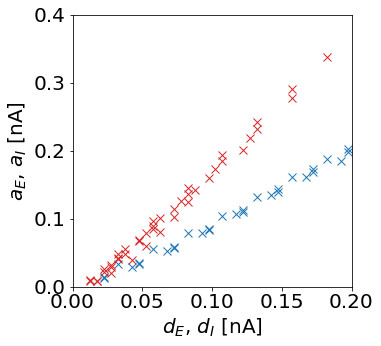

correlation coefficient:  [[1.         0.96509624]
 [0.96509624 1.        ]]
correlation coefficient:  [[1.         0.97538718]
 [0.97538718 1.        ]]


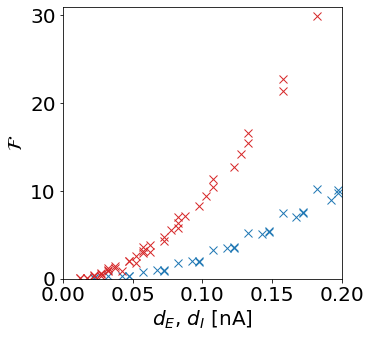

correlation coefficient:  [[ 1.         -0.66474976]
 [-0.66474976  1.        ]]
correlation coefficient:  [[ 1.         -0.84327263]
 [-0.84327263  1.        ]]


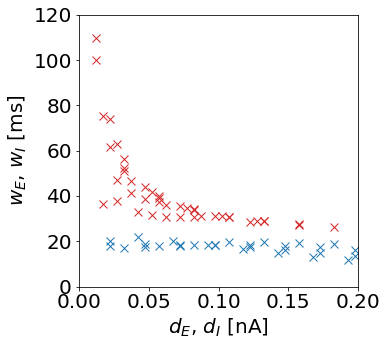

In [12]:
fig_a, ax = plt.subplots(figsize=(5,5))

fit_e = [[],[]]
fit_i = [[],[]]

for i in range(len(d_e)):
    if type(a_e[i]) == type(None):
        continue

    if np.abs(a_i[i]) < np.abs(a_e[i]):
        color_ = exc_red
        ax.plot(d_e[i], np.abs(a_e[i])/5., marker=marker_, color=color_, markersize=markersize_)
        fit_e[0].append(d_e[i])
        fit_e[1].append(np.abs(a_e[i])/5.)
    else:
        color_ = inh_blue
        ax.plot(d_i[i], np.abs(a_i[i])/5., marker=marker_, color=color_, markersize=markersize_)
        fit_i[0].append(d_i[i])
        fit_i[1].append(np.abs(a_i[i])/5.)


ax.set_xlim(0., 0.02)
ax.set_xticks(np.arange(0., 0.23, 0.05))
ax.set_ylim(0., 0.4)
ax.set_yticks(np.arange(0., 0.41, 0.1))
ax.grid(False)

ax.set_xlabel(r'$d_E$, $d_I$ [nA]', fontsize=fontsize_)
ax.set_ylabel(r'$a_{E}$, $a_I$ [nA]', fontsize=fontsize_)

ax.tick_params(axis='x', labelsize=fontsize_)
ax.tick_params(axis='y', labelsize=fontsize_)

#ax.set_title(r'Amplitude of control signal', fontsize=fontsize_)
print( 'correlation coefficient: ', np.corrcoef( fit_e[0], fit_e[1])  )
print( 'correlation coefficient: ', np.corrcoef( fit_i[0], fit_i[1])  )

filename_ = 'A_D_current2.png'
fig_a.savefig(os.path.join(savepath, filename_), bbox_inches='tight', facecolor=fig_a.get_facecolor(),
            edgecolor='none', dpi=300)
plt.show()

fig_c, ax = plt.subplots(figsize=(5,5))

fit_e = [[],[]]
fit_i = [[],[]]

for i in range(len(d_e)):
    if type(a_e[i]) == type(None):
        continue
        
    total_cost = cost_p_x[i] + cost_e_e[i] + cost_e_i[i]

    if np.abs(a_i[i]) < np.abs(a_e[i]):
        color_ = exc_red
        ax.plot(d_e[i], total_cost, marker=marker_, color=color_, markersize=markersize_)
        fit_e[0].append(d_e[i])
        fit_e[1].append(total_cost)
    else:
        color_ = inh_blue
        ax.plot(d_i[i], total_cost, marker=marker_, color=color_, markersize=markersize_)
        fit_i[0].append(d_i[i])
        fit_i[1].append(total_cost)


ax.set_xlim(0., 0.02)
ax.set_xticks(np.arange(0., 0.23, 0.05))
ax.set_ylim(0., 31)
ax.set_yticks(np.arange(0., 31, 10))
ax.grid(False)

ax.set_xlabel(r'$d_E$, $d_I$ [nA]', fontsize=fontsize_)
ax.set_ylabel(r'$\mathcal{F}$', fontsize=fontsize_)


ax.tick_params(axis='x', labelsize=fontsize_)
ax.tick_params(axis='y', labelsize=fontsize_)

#ax.set_title(r'Amplitude of control signal', fontsize=fontsize_)
print( 'correlation coefficient: ', np.corrcoef( fit_e[0], fit_e[1])  )
print( 'correlation coefficient: ', np.corrcoef( fit_i[0], fit_i[1])  )

filename_ = 'F_D_current2.png'
fig_c.savefig(os.path.join(savepath, filename_), bbox_inches='tight', facecolor=fig_a.get_facecolor(),
            edgecolor='none', dpi=300)
plt.show()

fig_w, ax = plt.subplots(figsize=(5,5))

fit_e = [[],[]]
fit_i = [[],[]]

for i in range(len(d_e)):
    if type(a_ee[i]) == type(None):
        continue

    if np.abs(a_i[i]) < np.abs(a_e[i]):
        color_ = exc_red
        ax.plot(d_e[i], w_e[i], marker=marker_, color=color_, markersize=markersize_)
        fit_e[0].append(d_e[i])
        fit_e[1].append(w_e[i])
    else:
        color_ = inh_blue
        ax.plot(d_i[i], w_i[i], marker=marker_, color=color_, markersize=markersize_)
        fit_i[0].append(d_i[i])
        fit_i[1].append(w_i[i])
     
ax.set_xlim(0., 0.2)
ax.set_xticks(np.arange(0., 0.21, 0.05))
ax.set_ylim(0., 120.)
ax.set_yticks(np.arange(0., 121., 20.))
ax.grid(False)

ax.set_xlabel(r'$d_E$, $d_I$ [nA]', fontsize=fontsize_)
ax.set_ylabel(r'$w_E$, $w_I$ [ms]', fontsize=fontsize_)

ax.tick_params(axis='x', labelsize=fontsize_)
ax.tick_params(axis='y', labelsize=fontsize_)

#ax.set_title(cols[0], fontsize=fontsize_)
# best correlation with mu_e
print( 'correlation coefficient: ', np.corrcoef( fit_e[0], fit_e[1])  )
print( 'correlation coefficient: ', np.corrcoef( fit_i[0], fit_i[1])  )

filename_ = 'W_D_current2.png'
fig_w.savefig(os.path.join(savepath, filename_), bbox_inches='tight', facecolor=fig_a.get_facecolor(),
            edgecolor='none', dpi=300)
plt.show()

In [13]:
readpath = '.' + os.sep + 'data_final_rate' + os.sep
readcase('3', readpath)

case =  ./data_final_rate/ 3
case =  ./data_final_rate/ 3


correlation coefficient:  [[1.         0.94685077]
 [0.94685077 1.        ]]


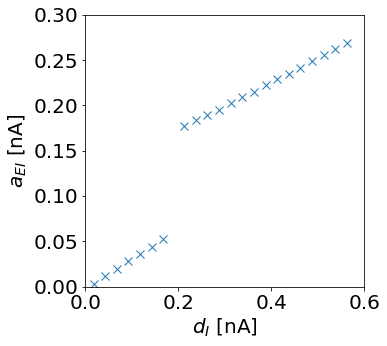

correlation coefficient:  [[1.         0.94186841]
 [0.94186841 1.        ]]


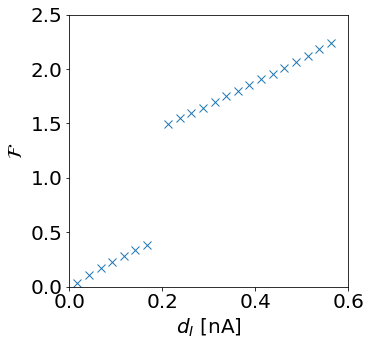

correlation coefficient:  [[ 1. nan]
 [nan nan]]


/home/lena/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/lena/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


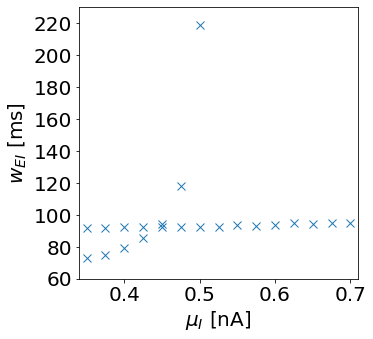

In [14]:
fig_a, ax = plt.subplots(figsize=(5,5))

fit_ = [[],[]]

for i in range(len(d_e)):
    if type(a_ee[i]) == type(None):
        continue
        
    if type_[i] == 6:
        continue

    if np.abs(a_ei[i]) > np.abs(a_ie[i]):
        color_ = inh_blue
        ax.plot(d_i[i], np.abs(a_ei[i]), marker=marker_, color=color_, markersize=markersize_)
        fit_[0].append(d_i[i])
        fit_[1].append(np.abs(a_ei[i]))
   
ax.set_xlim(0., 0.6)
ax.set_xticks(np.arange(0., 0.7, 0.2))
ax.set_ylim(0., 0.3)
ax.set_yticks(np.arange(0., 0.31, 0.05))
ax.grid(False)

ax.set_xlabel(r'$d_I$ [nA]', fontsize=fontsize_)
ax.set_ylabel(r'$a_{EI}$ [nA]', fontsize=fontsize_)

ax.tick_params(axis='x', labelsize=fontsize_)
ax.tick_params(axis='y', labelsize=fontsize_)

#ax.set_title(r'Amplitude of control signal', fontsize=fontsize_)
print( 'correlation coefficient: ', np.corrcoef( fit_[0], fit_[1])  )

filename_ = 'A_D_rate3.png'
fig_a.savefig(os.path.join(savepath, filename_), bbox_inches='tight', facecolor=fig_a.get_facecolor(),
            edgecolor='none', dpi=300)
plt.show()

fig_a, ax = plt.subplots(figsize=(5,5))

fit_ = [[],[]]

for i in range(len(d_e)):
    if type(a_ee[i]) == type(None):
        continue
        
    if type_[i] == 6:
        continue

    if np.abs(a_ei[i]) > np.abs(a_ie[i]):
        color_ = inh_blue
        total_cost = cost_p_x[i] + cost_s_ee[i] + cost_s_ei[i] + cost_s_ie[i] + cost_s_ii[i]
        ax.plot(d_i[i], total_cost, marker=marker_, color=color_, markersize=markersize_)
        fit_[0].append(d_i[i])
        fit_[1].append(total_cost)
        
ax.set_xlim(0., 0.6)
ax.set_xticks(np.arange(0., 0.7, 0.2))
ax.set_ylim(0., 2.5)
ax.set_yticks(np.arange(0., 2.6, 0.5))
ax.grid(False)

ax.set_xlabel(r'$d_I$ [nA]', fontsize=fontsize_)
ax.set_ylabel(r'$\mathcal{F}$', fontsize=fontsize_)

ax.tick_params(axis='x', labelsize=fontsize_)
ax.tick_params(axis='y', labelsize=fontsize_)

#ax.set_title(cols[0], fontsize=fontsize_)
print( 'correlation coefficient: ', np.corrcoef( fit_[0], fit_[1])  )

filename_ = 'F_D_rate3.png'
fig_a.savefig(os.path.join(savepath, filename_), bbox_inches='tight', facecolor=fig_a.get_facecolor(),
            edgecolor='none', dpi=300)
plt.show()

fig_a, ax = plt.subplots(figsize=(5,5))

fit_ = [[], []]

for i in range(len(d_e)):
    if type(a_ee[i]) == type(None):
        continue
        
    if type_[i] == 6:
        continue

    if np.abs(a_ei[i]) > np.abs(a_ie[i]):
        color_ = inh_blue
        ax.plot(mu_i[i], w_ei[i], marker=marker_, color=color_, markersize=markersize_)
        fit_[0].append(mu_i[i])
        fit_[1].append(w_ee[i])
     
ax.set_xlim(0.34, 0.71)
ax.set_xticks(np.arange(0.4, 0.75, 0.1))
ax.set_ylim(60., 230.)
ax.set_yticks(np.arange(60., 230., 20.))
ax.grid(False)

ax.set_xlabel(r'$\mu_I$ [nA]', fontsize=fontsize_)
ax.set_ylabel(r'$w_{EI}$ [ms]', fontsize=fontsize_)

ax.tick_params(axis='x', labelsize=fontsize_)
ax.tick_params(axis='y', labelsize=fontsize_)

#ax.set_title(cols[0], fontsize=fontsize_)
# best correlation with mu_e
print( 'correlation coefficient: ', np.corrcoef( fit_[0], fit_[1])  )

filename_ = 'W_mu_rate3.png'
fig_a.savefig(os.path.join(savepath, filename_), bbox_inches='tight', facecolor=fig_a.get_facecolor(),
            edgecolor='none', dpi=300)
plt.show()

In [15]:
readpath = '.' + os.sep + 'data_final_current' + os.sep
readcase('3', readpath)

case =  ./data_final_current/ 3
case =  ./data_final_current/ 3


correlation coefficient:  [[1.         0.96188371]
 [0.96188371 1.        ]]


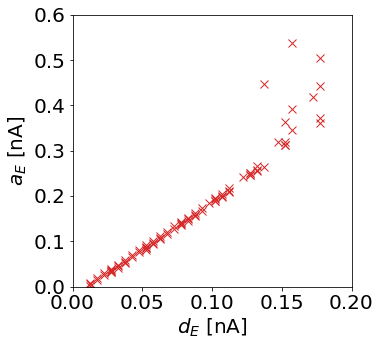

correlation coefficient:  [[1.         0.99643644]
 [0.99643644 1.        ]]


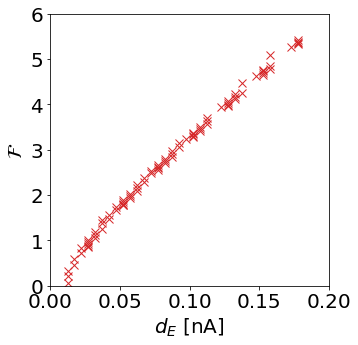

correlation coefficient:  [[ 1.         -0.57122244]
 [-0.57122244  1.        ]]


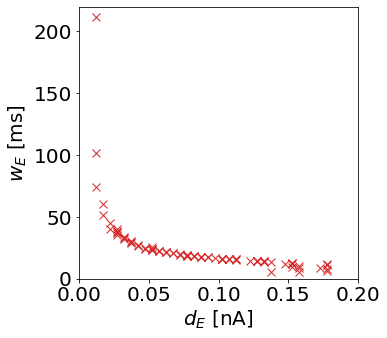

In [16]:
fig_a, ax = plt.subplots(figsize=(5,5))

fit_e = [[],[]]

for i in range(len(d_e)):
    if type(a_e[i]) == type(None):
        continue

    if np.abs(a_i[i]) < np.abs(a_e[i]):
        color_ = exc_red
        ax.plot(d_e[i], np.abs(a_e[i])/5., marker=marker_, color=color_, markersize=markersize_)
        fit_e[0].append(d_e[i])
        fit_e[1].append(np.abs(a_e[i])/5.)


ax.set_xlim(0., 0.2)
ax.set_xticks(np.arange(0., 0.21, 0.05))
ax.set_ylim(0., 0.6)
ax.set_yticks(np.arange(0., 0.7, 0.1))
ax.grid(False)

ax.set_xlabel(r'$d_E$ [nA]', fontsize=fontsize_)
ax.set_ylabel(r'$a_{E}$ [nA]', fontsize=fontsize_)

ax.tick_params(axis='x', labelsize=fontsize_)
ax.tick_params(axis='y', labelsize=fontsize_)

#ax.set_title(r'Amplitude of control signal', fontsize=fontsize_)
print( 'correlation coefficient: ', np.corrcoef( fit_e[0], fit_e[1])  )

filename_ = 'A_D_current3.png'
fig_a.savefig(os.path.join(savepath, filename_), bbox_inches='tight', facecolor=fig_a.get_facecolor(),
            edgecolor='none', dpi=300)
plt.show()

fig_c, ax = plt.subplots(figsize=(5,5))

fit_e = [[],[]]
fit_i = [[],[]]

for i in range(len(d_e)):
    if type(a_e[i]) == type(None):
        continue
        
    total_cost = cost_p_x[i] + cost_s_e[i] + cost_s_i[i]

    if np.abs(a_i[i]) < np.abs(a_e[i]):
        color_ = exc_red
        ax.plot(d_e[i], total_cost, marker=marker_, color=color_, markersize=markersize_)
        fit_e[0].append(d_e[i])
        fit_e[1].append(total_cost)


ax.set_xlim(0., 0.2)
ax.set_xticks(np.arange(0., 0.21, 0.05))
ax.set_ylim(0., 6)
ax.set_yticks(np.arange(0., 6.1, 1))
ax.grid(False)

ax.set_xlabel(r'$d_E$ [nA]', fontsize=fontsize_)
ax.set_ylabel(r'$\mathcal{F}$', fontsize=fontsize_)


ax.tick_params(axis='x', labelsize=fontsize_)
ax.tick_params(axis='y', labelsize=fontsize_)

#ax.set_title(r'Amplitude of control signal', fontsize=fontsize_)
print( 'correlation coefficient: ', np.corrcoef( fit_e[0], fit_e[1])  )

filename_ = 'F_D_current3.png'
fig_c.savefig(os.path.join(savepath, filename_), bbox_inches='tight', facecolor=fig_a.get_facecolor(),
            edgecolor='none', dpi=300)
plt.show()

fig_w, ax = plt.subplots(figsize=(5,5))

fit_e = [[],[]]
fit_i = [[],[]]

for i in range(len(d_e)):
    if type(a_ee[i]) == type(None):
        continue

    if np.abs(a_i[i]) < np.abs(a_e[i]):
        color_ = exc_red
        ax.plot(d_e[i], w_e[i], marker=marker_, color=color_, markersize=markersize_)
        fit_e[0].append(d_e[i])
        fit_e[1].append(w_e[i])
     
ax.set_xlim(0., 0.2)
ax.set_xticks(np.arange(0., 0.21, 0.05))
ax.set_ylim(0., 220.)
ax.set_yticks(np.arange(0., 221., 50.))
ax.grid(False)

ax.set_xlabel(r'$d_E$ [nA]', fontsize=fontsize_)
ax.set_ylabel(r'$w_E$ [ms]', fontsize=fontsize_)

ax.tick_params(axis='x', labelsize=fontsize_)
ax.tick_params(axis='y', labelsize=fontsize_)

#ax.set_title(cols[0], fontsize=fontsize_)
# best correlation with mu_e
print( 'correlation coefficient: ', np.corrcoef( fit_e[0], fit_e[1])  )

filename_ = 'W_D_current3.png'
fig_w.savefig(os.path.join(savepath, filename_), bbox_inches='tight', facecolor=fig_a.get_facecolor(),
            edgecolor='none', dpi=300)
plt.show()

In [17]:
readpath = '.' + os.sep + 'data_final_rate' + os.sep
readcase('4', readpath)

case =  ./data_final_rate/ 4


KeyboardInterrupt: 

In [ ]:
fig_a, ax = plt.subplots(figsize=(5,5))

fit_ = [[],[]]

for i in range(len(d_e)):
    if type(a_ee[i]) == type(None):
        continue
        
    if type_[i] == 6:
        continue

    if np.abs(a_ei[i]) > np.abs(a_ie[i]):
        color_ = inh_blue
        ax.plot(d_i[i], np.abs(a_ei[i]), marker=marker_, color=color_, markersize=markersize_)
        fit_[0].append(d_i[i])
        fit_[1].append(np.abs(a_ei[i]))
   
ax.set_xlim(0., 0.6)
ax.set_xticks(np.arange(0., 0.7, 0.2))
ax.set_ylim(0., 0.3)
ax.set_yticks(np.arange(0., 0.31, 0.05))
ax.grid(False)

ax.set_xlabel(r'$d_I$ [nA]', fontsize=fontsize_)
ax.set_ylabel(r'$a_{EI}$ [nA]', fontsize=fontsize_)

ax.tick_params(axis='x', labelsize=fontsize_)
ax.tick_params(axis='y', labelsize=fontsize_)

#ax.set_title(r'Amplitude of control signal', fontsize=fontsize_)
print( 'correlation coefficient: ', np.corrcoef( fit_[0], fit_[1])  )

filename_ = 'A_D_rate4.png'
fig_a.savefig(os.path.join(savepath, filename_), bbox_inches='tight', facecolor=fig_a.get_facecolor(),
            edgecolor='none', dpi=300)
plt.show()

fig_a, ax = plt.subplots(figsize=(5,5))

fit_ = [[],[]]

for i in range(len(d_e)):
    if type(a_ee[i]) == type(None):
        continue
        
    if type_[i] == 6:
        continue

    if np.abs(a_ei[i]) > np.abs(a_ie[i]):
        color_ = inh_blue
        total_cost = cost_p_x[i] + cost_e_ee[i] + cost_e_ei[i] + cost_e_ie[i] + cost_e_ii[i]
        ax.plot(d_i[i], total_cost, marker=marker_, color=color_, markersize=markersize_)
        fit_[0].append(d_i[i])
        fit_[1].append(total_cost)
        
ax.set_xlim(0., 0.6)
ax.set_xticks(np.arange(0., 0.7, 0.2))
ax.set_ylim(0., 2.5)
ax.set_yticks(np.arange(0., 2.6, 0.5))
ax.grid(False)

ax.set_xlabel(r'$d_I$ [nA]', fontsize=fontsize_)
ax.set_ylabel(r'$\mathcal{F}$', fontsize=fontsize_)

ax.tick_params(axis='x', labelsize=fontsize_)
ax.tick_params(axis='y', labelsize=fontsize_)

#ax.set_title(cols[0], fontsize=fontsize_)
print( 'correlation coefficient: ', np.corrcoef( fit_[0], fit_[1])  )

filename_ = 'F_D_rate4.png'
fig_a.savefig(os.path.join(savepath, filename_), bbox_inches='tight', facecolor=fig_a.get_facecolor(),
            edgecolor='none', dpi=300)
plt.show()

fig_a, ax = plt.subplots(figsize=(5,5))

fit_ = [[], []]

for i in range(len(d_e)):
    if type(a_ee[i]) == type(None):
        continue
        
    if type_[i] == 6:
        continue

    if np.abs(a_ei[i]) > np.abs(a_ie[i]):
        color_ = inh_blue
        ax.plot(mu_i[i], w_ei[i], marker=marker_, color=color_, markersize=markersize_)
        fit_[0].append(mu_i[i])
        fit_[1].append(w_ee[i])
     
ax.set_xlim(0.34, 0.71)
ax.set_xticks(np.arange(0.4, 0.75, 0.1))
ax.set_ylim(60., 230.)
ax.set_yticks(np.arange(60., 230., 20.))
ax.grid(False)

ax.set_xlabel(r'$\mu_I$ [nA]', fontsize=fontsize_)
ax.set_ylabel(r'$w_{EI}$ [ms]', fontsize=fontsize_)

ax.tick_params(axis='x', labelsize=fontsize_)
ax.tick_params(axis='y', labelsize=fontsize_)

#ax.set_title(cols[0], fontsize=fontsize_)
# best correlation with mu_e
print( 'correlation coefficient: ', np.corrcoef( fit_[0], fit_[1])  )

filename_ = 'W_mu_rate4.png'
fig_a.savefig(os.path.join(savepath, filename_), bbox_inches='tight', facecolor=fig_a.get_facecolor(),
            edgecolor='none', dpi=300)
plt.show()

In [ ]:
readpath = '.' + os.sep + 'data_final_current' + os.sep
readcase('4', readpath)

In [ ]:
fig_a, ax = plt.subplots(figsize=(5,5))

fit_e = [[],[]]

for i in range(len(d_e)):
    if type(a_e[i]) == type(None):
        continue

    if np.abs(a_i[i]) < np.abs(a_e[i]):
        color_ = exc_red
        ax.plot(d_e[i], np.abs(a_e[i])/5., marker=marker_, color=color_, markersize=markersize_)
        fit_e[0].append(d_e[i])
        fit_e[1].append(np.abs(a_e[i])/5.)


ax.set_xlim(0., 0.2)
ax.set_xticks(np.arange(0., 0.21, 0.05))
ax.set_ylim(0., 0.45)
ax.set_yticks(np.arange(0., 0.5, 0.1))
ax.grid(False)

ax.set_xlabel(r'$d_E$ [nA]', fontsize=fontsize_)
ax.set_ylabel(r'$a_{E}$ [nA]', fontsize=fontsize_)

ax.tick_params(axis='x', labelsize=fontsize_)
ax.tick_params(axis='y', labelsize=fontsize_)

#ax.set_title(r'Amplitude of control signal', fontsize=fontsize_)
print( 'correlation coefficient: ', np.corrcoef( fit_e[0], fit_e[1])  )

filename_ = 'A_D_current4.png'
fig_a.savefig(os.path.join(savepath, filename_), bbox_inches='tight', facecolor=fig_a.get_facecolor(),
            edgecolor='none', dpi=300)
plt.show()

fig_c, ax = plt.subplots(figsize=(5,5))

fit_e = [[],[]]
fit_i = [[],[]]

for i in range(len(d_e)):
    if type(a_e[i]) == type(None):
        continue
        
    total_cost = cost_p_x[i] + cost_e_e[i] + cost_e_i[i]

    if np.abs(a_i[i]) < np.abs(a_e[i]):
        color_ = exc_red
        ax.plot(d_e[i], total_cost, marker=marker_, color=color_, markersize=markersize_)
        fit_e[0].append(d_e[i])
        fit_e[1].append(total_cost)


ax.set_xlim(0., 0.2)
ax.set_xticks(np.arange(0., 0.21, 0.05))
ax.set_ylim(0., 15)
ax.set_yticks(np.arange(0., 16, 5))
ax.grid(False)

ax.set_xlabel(r'$d_E$ [nA]', fontsize=fontsize_)
ax.set_ylabel(r'$\mathcal{F}$', fontsize=fontsize_)


ax.tick_params(axis='x', labelsize=fontsize_)
ax.tick_params(axis='y', labelsize=fontsize_)

#ax.set_title(r'Amplitude of control signal', fontsize=fontsize_)
print( 'correlation coefficient: ', np.corrcoef( fit_e[0], fit_e[1])  )

filename_ = 'F_D_current4.png'
fig_c.savefig(os.path.join(savepath, filename_), bbox_inches='tight', facecolor=fig_a.get_facecolor(),
            edgecolor='none', dpi=300)
plt.show()

fig_w, ax = plt.subplots(figsize=(5,5))

fit_e = [[],[]]
fit_i = [[],[]]

for i in range(len(d_e)):
    if type(a_ee[i]) == type(None):
        continue

    if np.abs(a_i[i]) < np.abs(a_e[i]):
        color_ = exc_red
        ax.plot(d_e[i], w_e[i], marker=marker_, color=color_, markersize=markersize_)
        fit_e[0].append(d_e[i])
        fit_e[1].append(w_e[i])
     
ax.set_xlim(0., 0.2)
ax.set_xticks(np.arange(0., 0.21, 0.05))
ax.set_ylim(0., 220.)
ax.set_yticks(np.arange(0., 221., 50.))
ax.grid(False)

ax.set_xlabel(r'$d_E$ [nA]', fontsize=fontsize_)
ax.set_ylabel(r'$w_E$ [ms]', fontsize=fontsize_)

ax.tick_params(axis='x', labelsize=fontsize_)
ax.tick_params(axis='y', labelsize=fontsize_)

#ax.set_title(cols[0], fontsize=fontsize_)
# best correlation with mu_e
print( 'correlation coefficient: ', np.corrcoef( fit_e[0], fit_e[1])  )

filename_ = 'W_D_current4.png'
fig_w.savefig(os.path.join(savepath, filename_), bbox_inches='tight', facecolor=fig_a.get_facecolor(),
            edgecolor='none', dpi=300)
plt.show()